In [2]:
import tensorflow as tf
import numpy as np
import keras
tf.__version__


Using TensorFlow backend.


'1.15.0'

In [3]:
cifar10 = keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
num_classes = 10

print("Number of train images: {}".format(len(x_train)))
print("Number of train labels: {}".format(len(y_train)))
print("Number of test images: {}".format(len(x_test)))
print("Number of test labels: {}".format(len(y_test)))


Number of train images: 50000
Number of train labels: 50000
Number of test images: 10000
Number of test labels: 10000


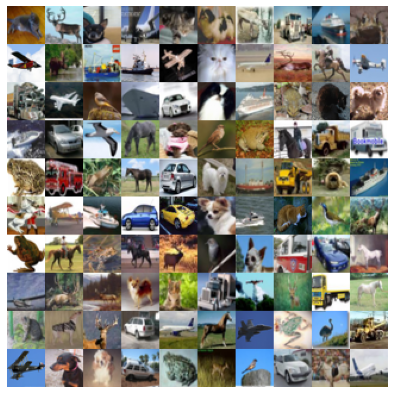

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
matplotlib.rc('font', family='NanumGothic')  # Linumx
def display_cifar(images, size):
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)])
                      for i in range(size)])
    plt.imshow(im)
    plt.show()
      
figsize(15, 7)
display_cifar(x_train, 10)


In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
layers = keras.layers
strategy = tf.distribute.MirroredStrategy()

model = keras.models.Sequential([
    layers.Conv2D(64, kernel_size=(3,3), padding="same",input_shape=(32,32,3),activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1024, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
model.fit(x_train,y_train, epochs=10, validation_data=(x_test,y_test))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 284us/step - loss: 1.6392 - accuracy: 0.3793 - val_loss: 1.3177 - val_accuracy: 0.5162
Epoch 2/10
50000/50000 [==============================] - 13s 253us/step - loss: 1.1202 - accuracy: 0.5994 - val_loss: 0.9912 - val_accuracy: 0.6521
Epoch 3/10
50000/50000 [==============================] - 13s 259us/step - loss: 0.9177 - accuracy: 0.6790 - val_loss: 0.9160 - val_accuracy: 0.6830
Epoch 4/10
50000/50000 [==============================] - 13s 257us/step - loss: 0.7770 - accuracy: 0.7323 - val_loss: 0.8238 - val_accuracy: 0.7194
Epoch 5/10
50000/50000 [==============================] - 13s 256us/step - loss: 0.6696 - accuracy: 0.7701 - val_loss: 0.8645 - val_accuracy: 0.7136
Epoch 6/10
50000/50000 [==============================] - 13s 253us/step - loss: 0.5719 - accuracy: 0.8055 - val_loss: 0.8

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 512)        

In [8]:
model.evaluate(x_train, y_train)

50000/50000 [==============================] - 4s 84us/step


[0.29223259724378586, 0.9073399901390076]

In [9]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 89us/step


[0.9864373187065124, 0.7175999879837036]

In [20]:


dropout_model = keras.models.Sequential([
    layers.Conv2D(64, kernel_size=(3,3), padding="same",input_shape=(32,32,3),activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    
    layers.Dense(256, activation="relu"),

    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
])
dropout_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [21]:
dropout_history = dropout_model.fit(x_train,y_train, epochs=10, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 284us/step - loss: 1.6008 - accuracy: 0.3948 - val_loss: 1.3430 - val_accuracy: 0.5172
Epoch 2/10
50000/50000 [==============================] - 14s 274us/step - loss: 1.1506 - accuracy: 0.5920 - val_loss: 1.0862 - val_accuracy: 0.6278
Epoch 3/10
50000/50000 [==============================] - 14s 276us/step - loss: 0.9553 - accuracy: 0.6713 - val_loss: 0.9586 - val_accuracy: 0.6657
Epoch 4/10
50000/50000 [==============================] - 14s 274us/step - loss: 0.8220 - accuracy: 0.7216 - val_loss: 0.9025 - val_accuracy: 0.6875
Epoch 5/10
50000/50000 [==============================] - 14s 271us/step - loss: 0.7248 - accuracy: 0.7555 - val_loss: 0.8890 - val_accuracy: 0.7051
Epoch 6/10
50000/50000 [==============================] - 14s 272us/step - loss: 0.6550 - accuracy: 0.7801 - val_loss: 0.8627 - val_accuracy: 0.7209
Epoch 7/10
50000/50000 [==============================] 

In [22]:
dropout_model.evaluate(x_train, y_train)

50000/50000 [==============================] - 5s 90us/step


[0.3773729834127426, 0.876479983329773]

In [23]:
dropout_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 93us/step


[0.9547297867774963, 0.7208999991416931]

In [44]:
from PIL import Image
from glob import glob

image_list = []
for filename in glob("newImages/*.jpg"):
    img = Image.open(filename)
    image_list.append(img)

In [45]:
image_list

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FF8F8399128>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FF8F8399048>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FF8F83991D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FF8F8399240>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FF8F83992B0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FF8F8399320>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FF8F8399390>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FF8F8399400>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FF8F8399470>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FF8F83994E0>]

In [46]:
for i in range(len(image_list)):
    image_list[i] = np.asarray(image_list[i].resize((32,32)))
    image_list[i] = np.resize(image_list[i], (1,32,32,3))
    print(model.predict(image_list[i]))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  2.0952073e-19 0.0000000e+00 1.4510338e-30 0.0000000e+00 0.0000000e+00]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
